In [1]:
!pip install face-recognition==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=b359aee2d978a111b9a786c87e9b9ae502080a14dc285b4ff04a6c20896f84af
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [11]:
!pip show face_recognition
#1.3.0

Name: face-recognition
Version: 1.3.0
Summary: Recognize faces from Python or from the command line
Home-page: https://github.com/ageitgey/face_recognition
Author: Adam Geitgey
Author-email: ageitgey@gmail.com
License: MIT license
Location: /usr/local/lib/python3.10/dist-packages
Requires: Click, dlib, face-recognition-models, numpy, Pillow
Required-by: 


In [12]:
!python --version
#Python 3.10.12

Python 3.10.12


# Find faces in picture


In [2]:
#find faces in picture
import face_recognition
image = face_recognition.load_image_file("/content/adnan.jpeg")
face_locations = face_recognition.face_locations(image)

In [3]:
face_locations

[(38, 179, 113, 104)]

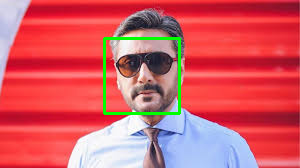

In [5]:
from google.colab.patches import cv2_imshow
import cv2

# Load the image
image = cv2.imread("/content/adnan.jpeg")

# Draw rectangles
for (top, right, bottom, left) in face_locations:
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the image
cv2_imshow(image)

# Find and manipulate facial features in pictures

In [7]:
import face_recognition
image = face_recognition.load_image_file("/content/adnan.jpeg")
face_landmarks_list = face_recognition.face_landmarks(image)

In [8]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/adnan.jpeg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

    pil_image.show()

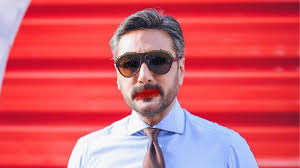

In [9]:
from IPython.display import display

display(pil_image)

# Identify faces in pictures

In [10]:
import face_recognition
known_image = face_recognition.load_image_file("/content/adnan.jpeg")
unknown_image = face_recognition.load_image_file("/content/adnan2.jpeg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)
results

[True]

Match found: True


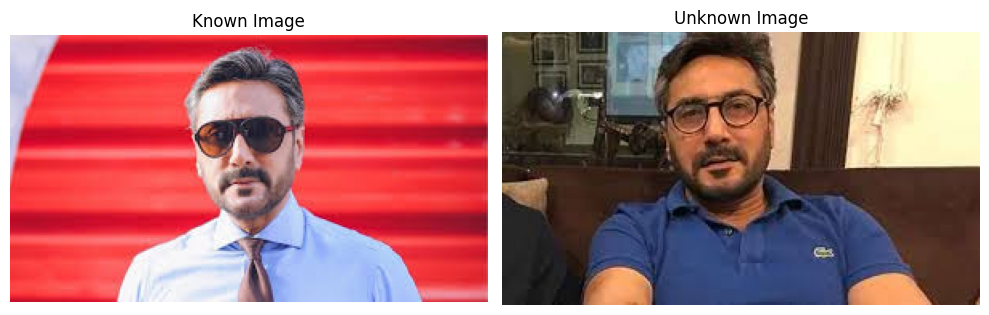

In [13]:
import face_recognition
import matplotlib.pyplot as plt
from PIL import Image

# Load images
known_image = face_recognition.load_image_file("/content/adnan.jpeg")
unknown_image = face_recognition.load_image_file("/content/adnan2.jpeg")

# Face encoding
known_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

# Compare faces
results = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print("Match found:", results[0])

# Display images side by side
known_image_pil = Image.fromarray(known_image)
unknown_image_pil = Image.fromarray(unknown_image)

# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(known_image_pil)
ax[0].set_title("Known Image")
ax[0].axis("off")

ax[1].imshow(unknown_image_pil)
ax[1].set_title("Unknown Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()
